In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# True Match Expected

In [158]:
# Load CSV
df = pd.read_csv("fixed.csv")

# # Subtract 15 from the Confidence column (Temporary for testing)
# df['Confidence'] = df['Confidence'] - 15

In [159]:
# # Convert Timestamp to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# # Find start and end times
# start_time = df['Timestamp'].min()
# end_time = df['Timestamp'].max()
# mid_time = start_time + (end_time - start_time) / 2

# # Filter to middle 5 seconds
# middle_df = df[
#     (df['Timestamp'] >= mid_time - pd.Timedelta(seconds=2.5)) &
#     (df['Timestamp'] <= mid_time + pd.Timedelta(seconds=2.5))
# ]

In [160]:
# Sort by Timestamp to ensure proper order
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Get the middle 150 rows
middle_start = (len(df) - 150) // 2
middle_df = df.iloc[middle_start:middle_start + 150]

In [161]:
# Classify rows based on Confidence
middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'False Non-Match' if x > 50 else 'True Match')

# Count number of each MatchType across all runs
match_counts_1 = middle_df['MatchType'].value_counts()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_25864\4139867005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'False Non-Match' if x > 50 else 'True Match')


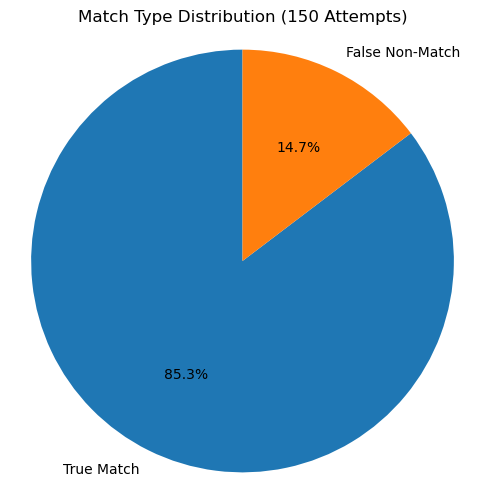

In [162]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(match_counts_1, labels=match_counts_1.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Type Distribution (150 Attempts)")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

# True Non-Match Expected

In [163]:
# Load CSV
df = pd.read_csv("results/recognition_log_train_jenna_correct_camera.csv")

# # Subtract 20 from the Confidence column (Temporary for testing)
# df['Confidence'] = df['Confidence'] - 20

In [164]:
# # Convert Timestamp to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# # Find start and end times
# start_time = df['Timestamp'].min()
# end_time = df['Timestamp'].max()
# mid_time = start_time + (end_time - start_time) / 2

# # Filter to middle 5 seconds
# middle_df = df[
#     (df['Timestamp'] >= mid_time - pd.Timedelta(seconds=2.5)) &
#     (df['Timestamp'] <= mid_time + pd.Timedelta(seconds=2.5))
# ]

In [165]:
# Sort by Timestamp to ensure proper order
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Get the middle 150 rows
middle_start = (len(df) - 150) // 2
middle_df = df.iloc[middle_start:middle_start + 150]

In [166]:
# Classify rows based on Confidence
middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'True Non-Match' if x > 50 else 'False Match')

# Count number of each MatchType across all runs
match_counts_2 = middle_df['MatchType'].value_counts()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_25864\4044853673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'True Non-Match' if x > 50 else 'False Match')


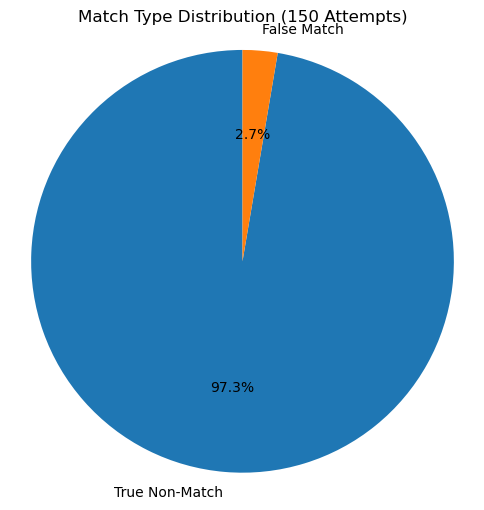

In [167]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(match_counts_2, labels=match_counts_2.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Type Distribution (150 Attempts)")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

# Combined Data

In [168]:
combined_counts = match_counts_1.add(match_counts_2, fill_value=0)
combined_counts = combined_counts.astype(int)
combined_counts

MatchType
False Match          4
False Non-Match     22
True Match         128
True Non-Match     146
Name: count, dtype: int32

In [169]:
match_counts_2

MatchType
True Non-Match    146
False Match         4
Name: count, dtype: int64

In [170]:
match_counts_1

MatchType
True Match         128
False Non-Match     22
Name: count, dtype: int64

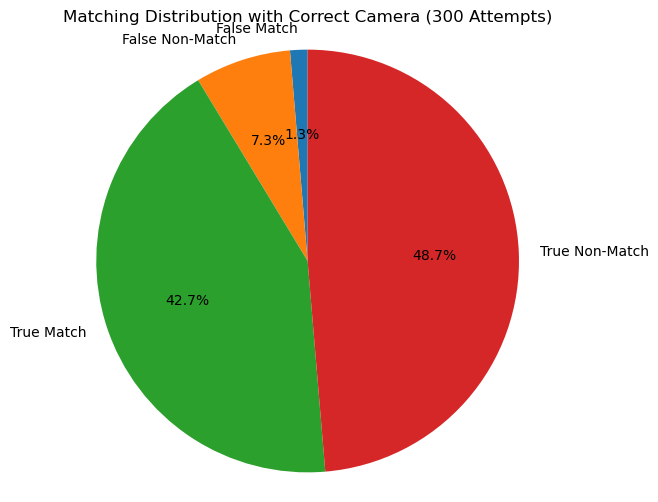

In [171]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Matching Distribution with Correct Camera (300 Attempts)")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()